# Lab #1 
#### Aidan Berres

#### Physics 434

#### 10/11/20

---


In [335]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## A little statistics
## Part 1
## 1. A)
Add explanation

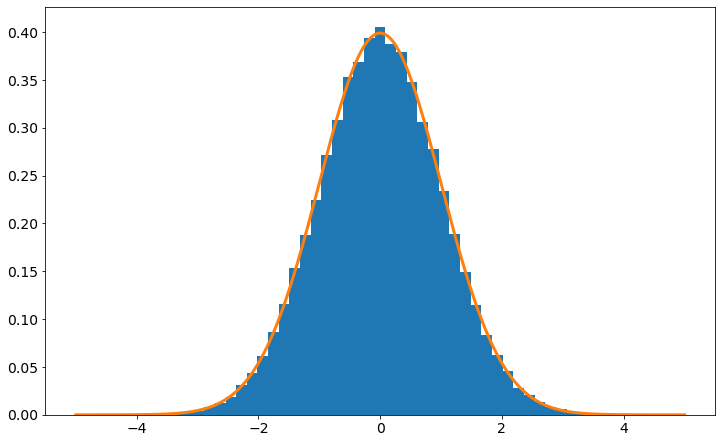

In [363]:
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 14)
#plt.xlim([4.95,5.05])
x = np.linspace(-5,5,1000)
ax.plot(x,stats.norm.pdf(x,loc = 0, scale = 1),linewidth=3)
plt.show()

## 1. B)
Add explanation

In [357]:
a=[0.1,0.5,1,1.5,2.5,4]
prob=[]
for i in range(len(a)):
    p=stats.norm.cdf(a[i],loc=0,scale=1)
    print(f"Z = {a[i]}"+'\n'+f"Probability = {p}")
    prob.append(p)

Z = 0.1
Probability = 0.539827837277029
Z = 0.5
Probability = 0.6914624612740131
Z = 1
Probability = 0.8413447460685429
Z = 1.5
Probability = 0.9331927987311419
Z = 2.5
Probability = 0.9937903346742238
Z = 4
Probability = 0.9999683287581669


## 1. C)

In [29]:
stats.norm.ppf(0.539827837277029)

0.10000000000000002

## 1. D)

In [358]:
stats.norm.ppf(prob)

array([0.1, 0.5, 1. , 1.5, 2.5, 4. ])

In [35]:
np.random.seed(seed=42)
d = stats.norm.rvs(loc = 5., scale = 0.01, size = 100000)
#draws=4000
#chi2=np.empty(100000)
samples=5
i=0
#while i<100000:
#    np.random.chisquare()

In [36]:
np.random.random_sample()

0.5589480049731603

In [41]:
np.random.chisquare(1)

1.1942846373851392

---
## Part 2, $\,\chi^2\,$ Distribution
PDF for $\,\chi^2\,$ =
${\displaystyle f(x;\,k)={\begin{cases}{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}},&x>0;\\0,&{\text{otherwise}}.\end{cases}}}$

Add Something

In [201]:
gam=scipy.special.gamma
def tc2(x,k):
    try:
        num=x**((k/2)-1)*np.exp(-x/2)
        f= num/(gam(k/2)*2**(k/2))
        return f
    except:
        return 0
def cd1(x,k):
    return scipy.special.gammainc(k/2,x/2)/gam(k/2)

In [204]:
tc2(-2,4)

-1.3591409142295225

## 2. B)
Add explanation

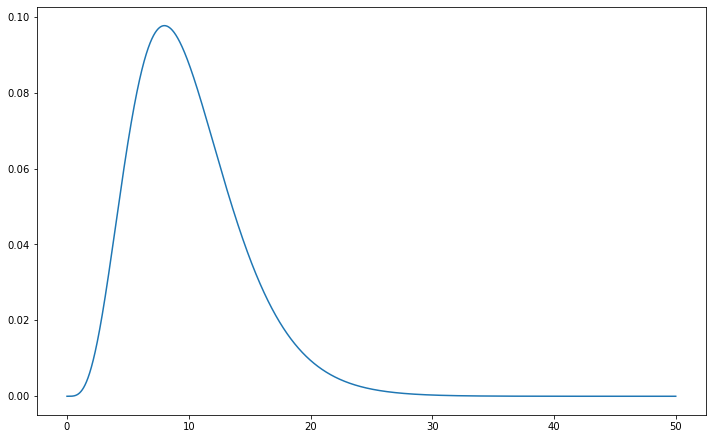

In [176]:
fig, ax = plt.subplots(figsize=(12, 7.5))
v = np.linspace(0,50, 100000)
k=10
ax.plot(v,tc2(v,k))

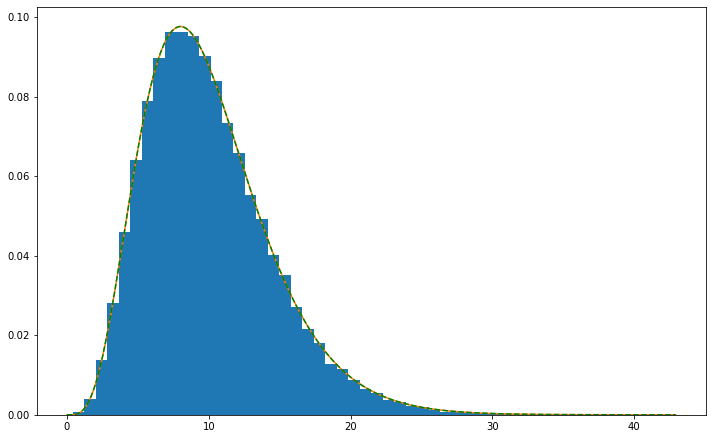

In [212]:
l=0.0
s=1.0
df=10
#d = stats.norm.rvs(loc = 5, scale = 0.01, size = 100000)
c21=stats.chi2.rvs(df,loc = l, scale = s, size = 100000,random_state=420)
fig, ax = plt.subplots(figsize=(12, 7.5))
#c2=np.random.chisquare(d)
ax.hist(c21, bins=50, density=True);
v = np.linspace(0,ax.get_xlim()[1], 100000)
ax.plot(v,stats.chi2.pdf(v,df,loc=l,scale=s))
#v = np.linspace(0,50, 100000)
k=10
ax.plot(v,tc2(v,df),color='g',ls='--');

1-cdf

### make more *plots*

---
## Part 3
Find the prob of your measurement is a background produced signal
* No signal data
* This is **only** *signal free* data
* I have to determine a hypothetical measurement
* I have to determine what the signal "*goodness*" conditions are (is it a better signal as my values get smaller/larger or near a point) 
* Then I can create an integral from the semi-log plot

${\displaystyle \int_{-\infty}^{x'}{{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}}}\,dx}$ 

but since 

${\displaystyle f(x;\,k)={\begin{cases}{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}},&x>0;\\0,&{\text{otherwise}}.\end{cases}}}$ 

we can possibly write,

${\displaystyle \int_{0}^{x'}{{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}}}\,dx}$

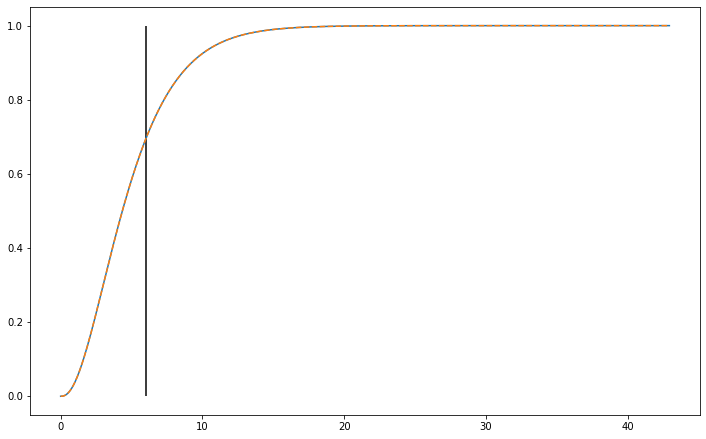

In [253]:
df=5
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.plot(v,stats.chi2.cdf(v,df,loc=0,scale=1))
ax.plot(v,cd1(v,df)/cd1(v,df).max(),ls='--')
ax.vlines(6,0,1)
#ax.plot(v,scipy.integrate.quad(tc2(v,df),-np.inf,50))

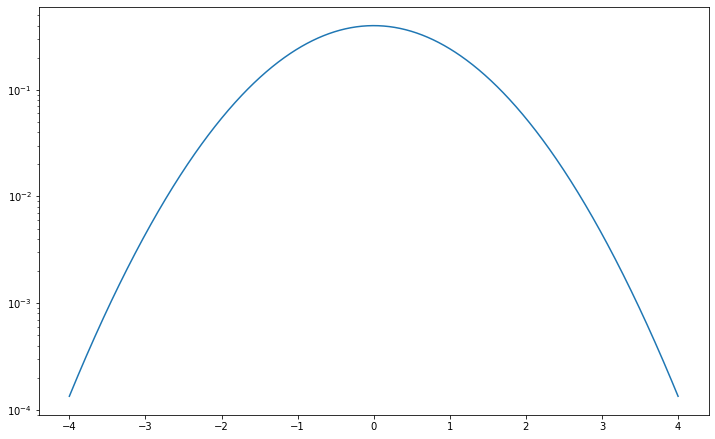

In [218]:
fig, ax = plt.subplots(figsize=(12, 7.5))
x=np.linspace(-4,4,1000)
plt.yscale('log')
ax.plot(x,stats.norm.pdf(x,loc=0,scale=1))

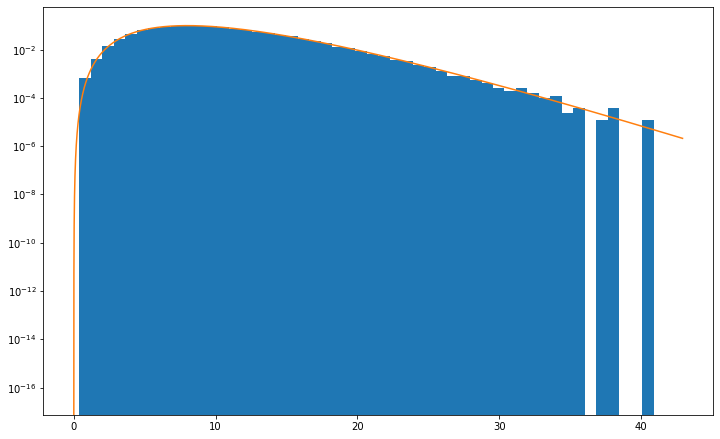

In [219]:
l=0.0
s=1.0
df=10
#d = stats.norm.rvs(loc = 5, scale = 0.01, size = 100000)
c21=stats.chi2.rvs(df,loc = l, scale = s, size = 100000,random_state=420)
fig, ax = plt.subplots(figsize=(12, 7.5))
#c2=np.random.chisquare(d)
ax.hist(c21, bins=50, density=True);
v = np.linspace(0,ax.get_xlim()[1], 100000)
plt.yscale('log')
#ax.plot(v,stats.chi2.pdf(v,df,loc=l,scale=s));
ax.plot(v,tc2(v,df));

# MY VALUE IS THE NUMBER "*6*" (SIX) ROKU dude 
* `df = 5`
* `loc = 0`
* `scale = 1` 

In [310]:
mv= 6 # da numbah
df = 5
l = 0
s = 1
rs = 420

In [311]:
bruv=stats.chi2.rvs(df=df,loc=l,scale=s,random_state=rs,size=100000)

In [315]:
cdef=stats.chi2.cdf(mv,df=df,loc=l,scale=s)
cdef

0.6937810815867212

In [316]:
stats.chi2.ppf(cdef,df,loc=l,scale=s)

5.999999999999993

z-scale value for 0.693 is around 0.51 from https://en.wikipedia.org/wiki/Standard_normal_table#cite_note-4 or 1.48

In [317]:
(mv-np.mean(bruv))/0.51

1.9777136316964037

See that above ^ That is *my* probability

In [366]:
stats.norm.cdf(100)

1.0

In [273]:
1-stats.chi2.cdf(8,6)

0.23810330555354442

In [306]:
np.mean(bruv)

5.991020807353433

In [304]:
np.mean(d)

-0.000280278255341172

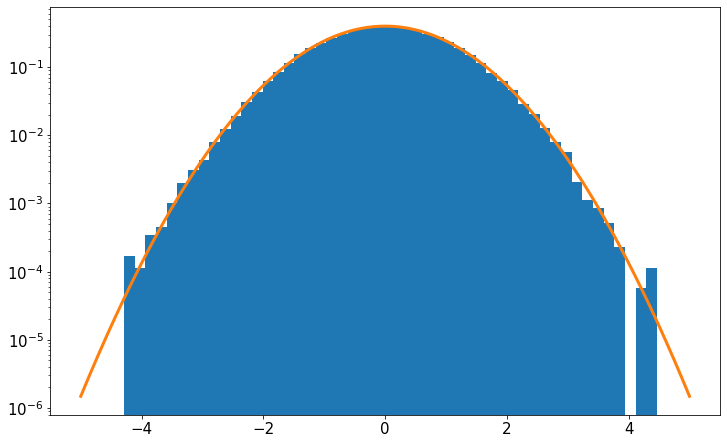

In [276]:
l=0.0
s=1.0
fig, ax = plt.subplots(figsize=(12, 7.5))
d = stats.norm.rvs(loc = l, scale = s, size = 100000,random_state=420)
ax.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 15)
#plt.xlim([,5.05])
x = np.linspace(-5,5,1000)
ax.plot(x,stats.norm.pdf(x,loc = l, scale = s),linewidth=3)

In [189]:
cd1(v,df)/cd1(v,df).max()

array([0.00000000e+00, 8.13673458e-21, 2.60321267e-19, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [193]:
cd1(v,df).max()

0.7522527770212051

---
## Non-continuous distributions
## Binomial Distribution
* If n = 40 and p = 0.5, this should mean that 20 out of the 40 experiments will most likely be "yes" so 20/40
* It is doing 100k sets of 10 individual tests
* "It is most probable that half the tests will give yes"

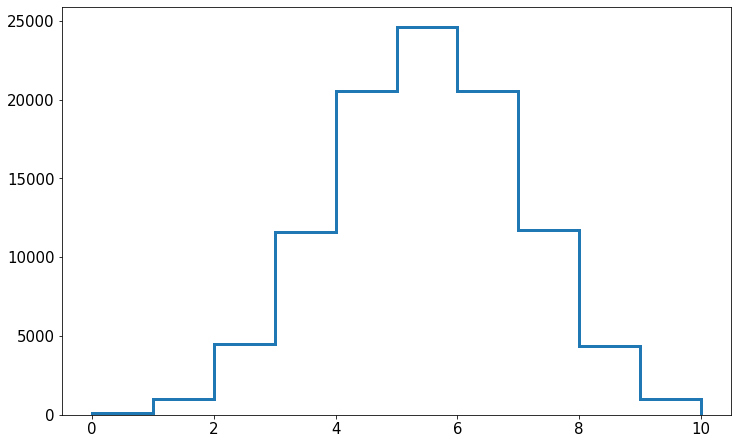

In [330]:
bi=stats.binom.rvs(n=10,p=0.5,size=100000,random_state=420)
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.hist(bi,histtype='step',linewidth=3)
ax.tick_params(labelsize = 15)
#plt.xlim([,5.05])
#x = np.linspace(-5,5,1000)
#ax.plot(x,stats.binom.pdf(x,loc = l, scale = s),linewidth=3)

In [334]:
100000/10

10000.0

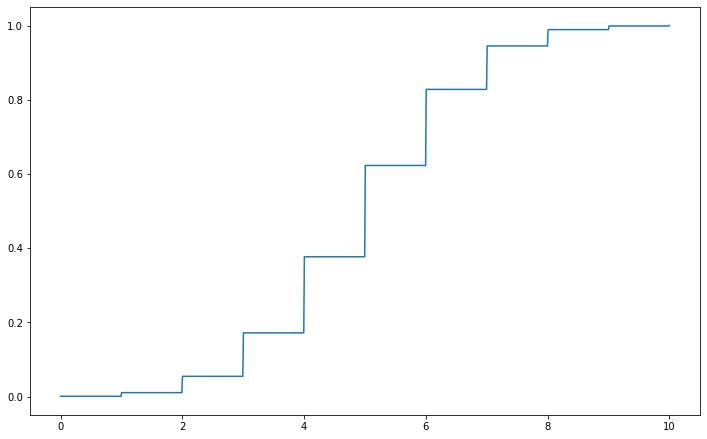

In [333]:
fig, ax = plt.subplots(figsize=(12, 7.5))
x = np.linspace(0,10,1000)
ax.plot(x,stats.binom.cdf(x,10,0.5))
#ax.hlines(cd2,90,130)

In [322]:
cd2=stats.binom.cdf(115,n=200,p=0.6)
stats.binom.ppf(cd2,n=200,p=0.6)

115.0

In [323]:
np.mean(bi)

119.97753

In [324]:
cd2

0.2571507919867965